<a href="https://colab.research.google.com/github/PriyankaRBT/BackgroundGenerator/blob/master/MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 9s 154us/sample - loss: 0.2690 - acc: 0.9203
Epoch 2/3
60000/60000 [==============================] - 9s 145us/sample - loss: 0.1101 - acc: 0.9656
Epoch 3/3
10000/10000 [==============================] - 1s 51us/sample - loss: 0.1065 - acc: 0.9661
0.10652987317480146 0.9661
7


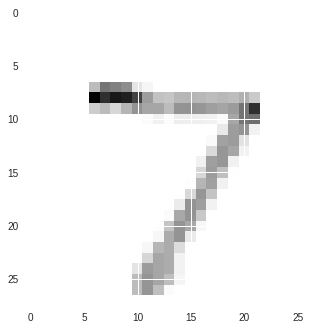

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np


mnist = tf.keras.datasets.mnist #28X28 of hand written digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#step 1 : Normalize or scale the data

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#plt.imshow(x_train[0])
#plt.show()
#print(x_train[0])

#step2: model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = x_train[0].shape))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


#define parameters for training model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train, epochs=3)

val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict([x_test])
print(np.argmax(predictions[0]))
plt.imshow(x_test[0])
plt.show()
